<a href="https://colab.research.google.com/github/shobica18/GRIPTASK/blob/main/GRIP_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRIPJANUARY2023
# **TASK 1: Prediction using supervised ML**

**Author: Shobica A**

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

***READ DATA***

In [14]:
# Reading the Data 
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')


In [16]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


***FIND NULL***

In [17]:
# Check for null values
data.isnull == True

False

***VISUALIZATION***

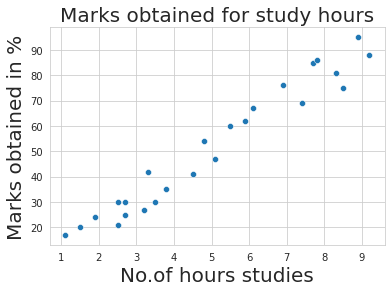

In [22]:
#Plot a visualisation
sns.set_style('whitegrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks obtained for study hours',size=20)
plt.ylabel('Marks obtained in %', size=20)
plt.xlabel('No.of hours studies', size=20)
plt.show()

***REGRESSION PLOT***

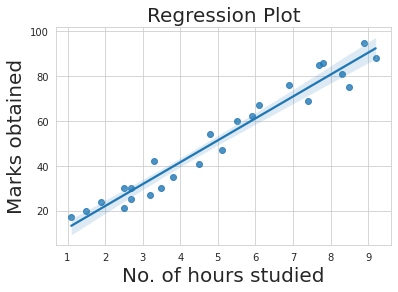

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [21]:
#Regression plot
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks obtained', size=20)
plt.xlabel('No. of hours studied', size=20)
plt.show()
print(data.corr())

# TRAINING A MODEL

***SPLITTING***

In [23]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [26]:
# Spliting the Data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

***FITTING***

In [27]:
# Fitting the Data
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Trained")

Model Trained


***PREDICTING***

In [28]:
# Prediction
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


***COMPARING***

In [29]:
#compare the marks with predicted
compare_mark = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_mark

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


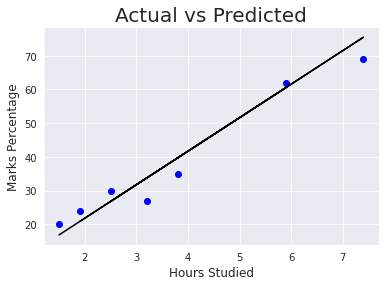

In [10]:
# Visualise comparison
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# EVALUATING

***ACCURACY***

In [11]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


***TESTING***

In [31]:
#Testing
hours = [8.30]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],2)))

Score = 84.45
